# E-Commerce Experience Insights
Congratulations! You just got some contract work with an e-commerce company based in New York City that sells clothing online but also offers in-store style and clothing advice sessions. Customers visit the store for sessions with a personal stylist, then they can go home and order clothes through either a mobile app or their website.

The company is trying to decide whether to focus their efforts on enhancing the mobile app experience or improving the website. They've hired you on contract to help them figure it out using a data-driven approach. This project utilizes a linear regression model implemented with scikit-learn, along with data analysis and visualization tools such as pandas, NumPy, Seaborn, and Matplotlib.

In this analysis, we will examine customer data to uncover insights about user preferences and behavior. By leveraging linear regression, we can quantitatively assess which platform—mobile or web—provides greater value to customers. Throughout the project, we will demonstrate how scikit-learn facilitates the modeling process, allowing us to efficiently train and evaluate our model without the need for manual adjustments to fit the best line. Let’s get started!

## Imports
** Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline
(You'll import sklearn as you need it.)**

In [82]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member.

** Read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [84]:
ecom = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/E-Commerce Experience Insights/Ecommerce Customers")

**Check the head of customers, and check out its info() and describe() methods.**

In [85]:
ecom.head(4)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344


In [86]:
ecom.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [87]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Exploratory Data Analysis

**Let's explore the data!**

For the rest of the exercise we'll only be using the numerical data of the csv file.
___
**Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

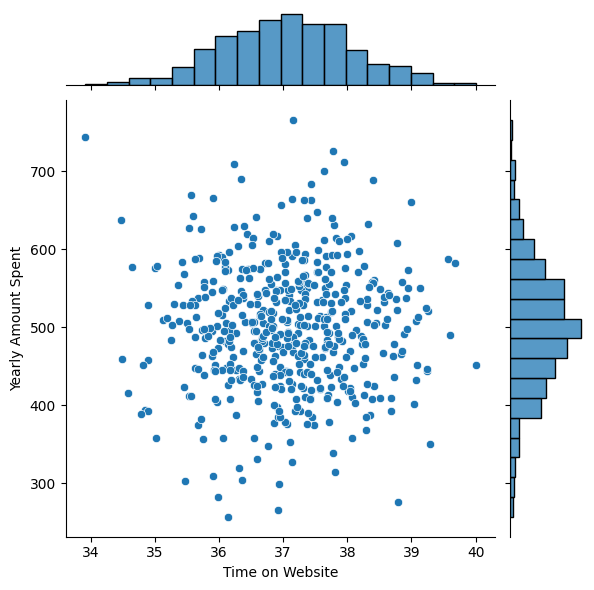

In [88]:
sns.jointplot(x = ecom['Time on Website'] , y = ecom['Yearly Amount Spent'])

** Do the same but with the Time on App column instead. **

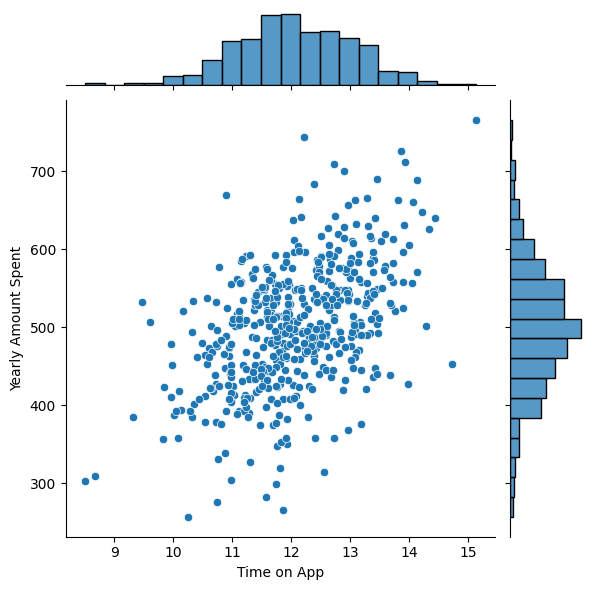

In [89]:
sns.jointplot(x = ecom['Time on App'] , y = ecom['Yearly Amount Spent'])

** Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

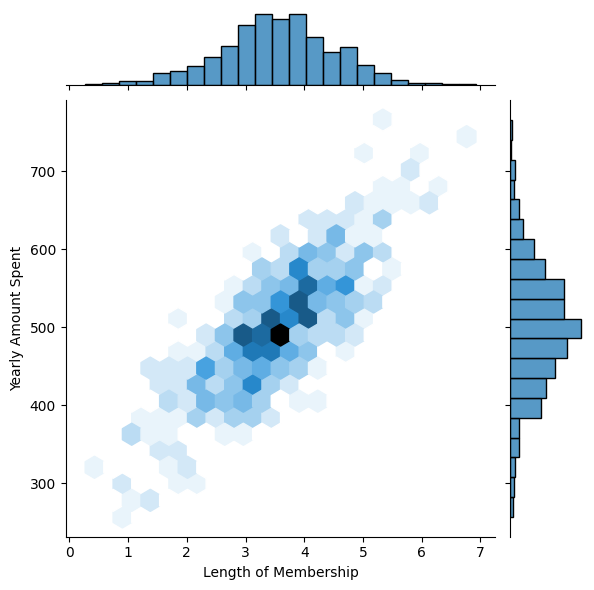

In [90]:
sns.jointplot(x = ecom['Length of Membership'] , y = ecom['Yearly Amount Spent'] , kind='hex')

**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.(Don't worry about the the colors)**

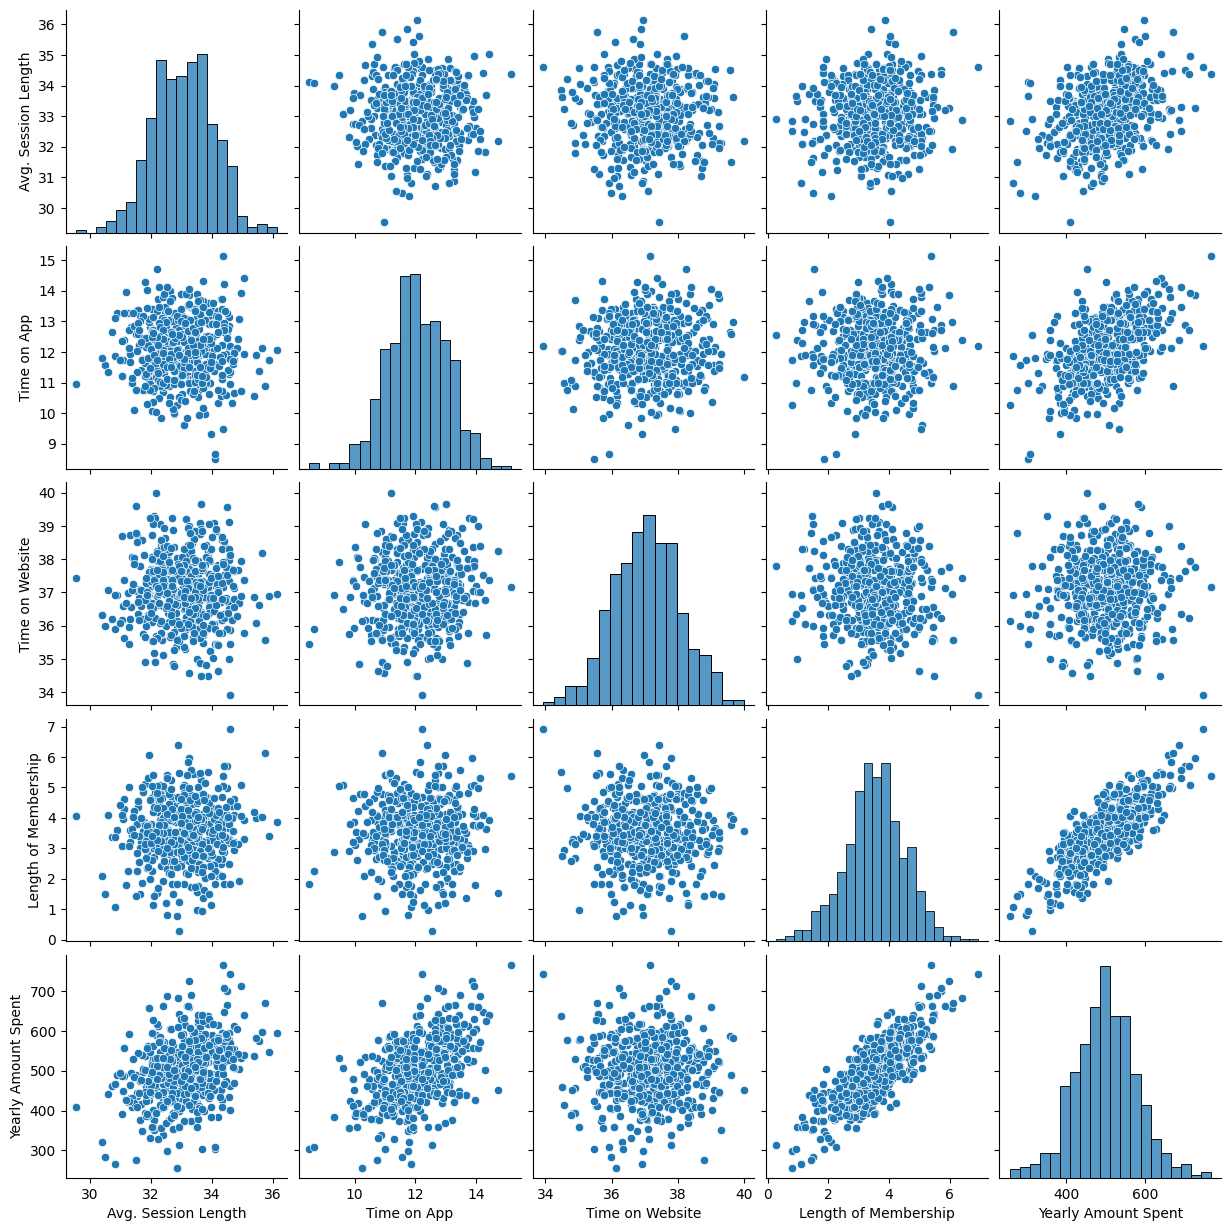

In [91]:
sns.pairplot(ecom)

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

Focusing on the "Time on App" and "Time on Website" features:

Time on App shows a slight positive correlation with "Yearly Amount Spent," with a weak upward trend.
Time on Website shows very little to no correlation with "Yearly Amount Spent," as the scatter points are more dispersed without a clear pattern.
Between the two, Time on App seems to have a slightly stronger correlation with "Yearly Amount Spent" compared to "Time on Website." However, the correlation does not appear to be very strong in either case.

<Axes: >

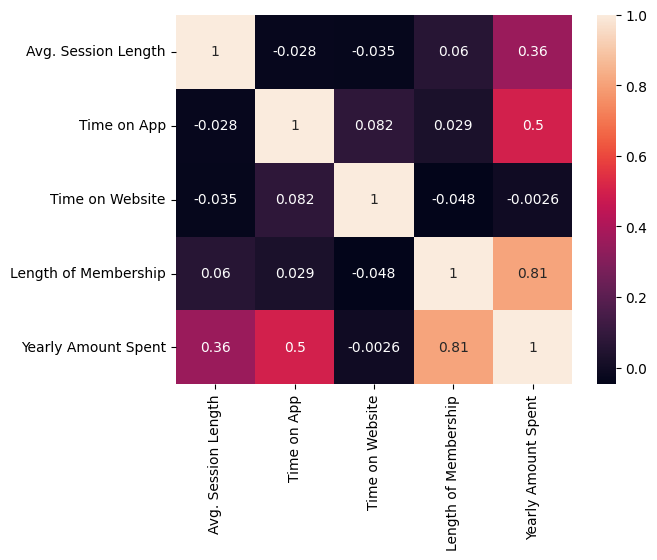

In [92]:
sns.heatmap(ecom.corr(numeric_only=True) , annot=True)

**Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

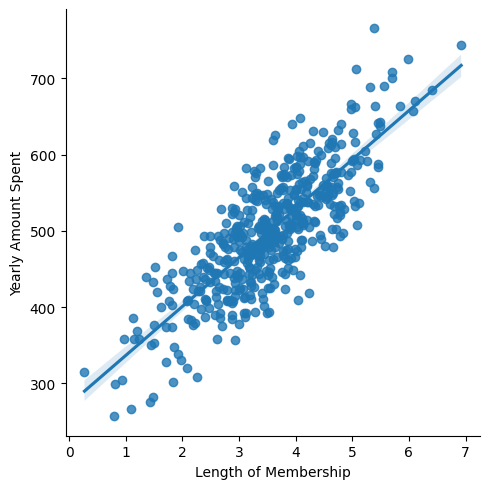

In [93]:
sns.lmplot(x='Length of Membership' , y='Yearly Amount Spent' , data=ecom)

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [94]:
ecom.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [95]:
ecom.head(2)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933


In [96]:
X = ecom[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y = ecom['Yearly Amount Spent']

In [97]:
print(X.shape)
print(y.shape)

(500, 4)
(500,)


In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

## Training the Model

Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [100]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [101]:
lm = LinearRegression()

** Train/fit lm on the training data.**

In [102]:
lm.fit(X_train , y_train)

LinearRegression()

**Print out the coefficients of the model**

In [103]:
W = lm.coef_
print(W)

[25.70676165 38.57260842  0.62520092 61.71767604]


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [104]:
predict = lm.predict(X_test)

** Create a scatterplot of the real test values versus the predicted values. **

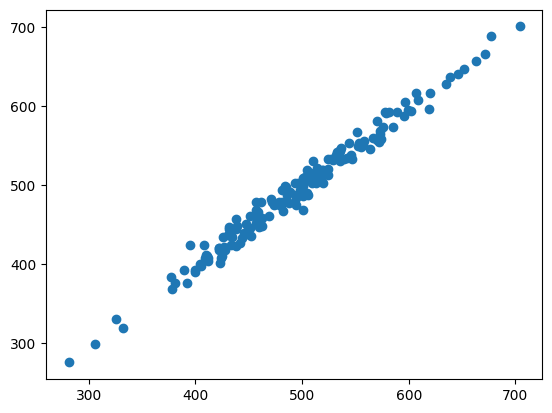

In [105]:
plt.scatter(predict , y_test)

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [106]:
from sklearn import metrics

In [107]:
MAE = metrics.mean_absolute_error(y_test , predict)
MSE = metrics.mean_squared_error(y_test , predict)
RMSE = np.sqrt(metrics.mean_squared_error(y_test , predict))
print(f"MAE = {MAE}")
print(f"MSE = {MSE}")
print(f"RMSE = {RMSE}")

MAE = 8.35357352501759
MSE = 102.4042865993193
RMSE = 10.119500313717042


## Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data.

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

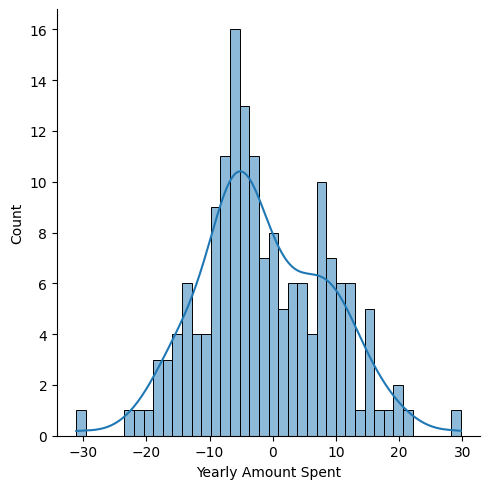

In [108]:
sns.displot((y_test - predict) , kde = True , bins = 40)

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

** Recreate the dataframe below. **

In [109]:
pd.DataFrame(W,X_train.columns , columns=['Weights / coefficients'])

,Weights / coefficients
Avg. Session Length,25.706762
Time on App,38.572608
Time on Website,0.625201
Length of Membership,61.717676


** How can you interpret these coefficients? **

*Answer here*

**Do you think the company should focus more on their mobile app or on their website?**

*Answer here*

## Great Job!

Congrats on your contract work! The company loved the insights! Let's move on.